In [1]:
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()

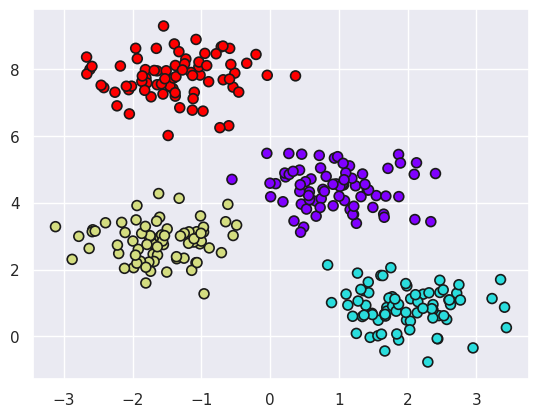

In [3]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=300, n_features=2, centers=4,
                 random_state=0, cluster_std=0.6)
plt.scatter(X[:,0], X[:,1], c=y, s=50, ec='k', lw=1.2,
            cmap=mpl.colormaps['rainbow'].resampled(4))

In [4]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=0)
labels = gmm.fit_predict(X)

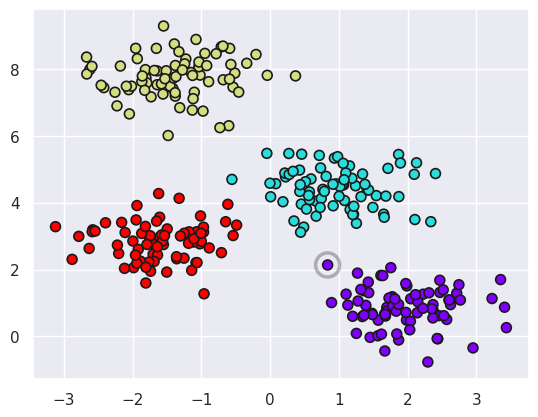

In [5]:
plt.scatter(X[:,0], X[:,1], c=labels, s=50, ec='k', lw=1.2,
            cmap=mpl.colormaps['rainbow'].resampled(4))
plt.scatter(X[0,0], X[0,1], s=300, ec='k', lw=2.5, fc='None', alpha=0.3)

In [6]:
yprob = gmm.predict_proba(X)
yprob[:10].round(2)

array([[0.97, 0.03, 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 1.  ],
       [0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  ]])

<ipython-input-7-90fba44b2b54>:15: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ellip = Ellipse(position, nsig*width, nsig*height, angle, **kwargs)


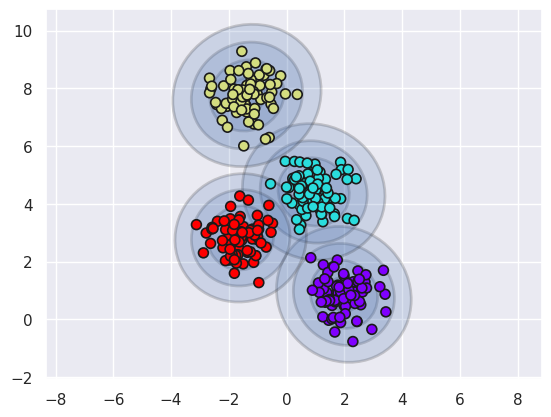

In [7]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
  ax = ax or plt.gca()

  if covariance.shape==(2,2):
    U,s,Vt  = np.linalg.svd(covariance)
    angle   = np.degrees(np.arctan2(U[1,0], U[0,0]))
    width,height = 2*np.sqrt(s)
  else:
    angle   = 0
    width, height = 2*np.sqrt(covariance)

  for nsig in range(1,5):
    ellip = Ellipse(position, nsig*width, nsig*height, angle, **kwargs)
    ax.add_patch(ellip)

def plot_gmm(gmm, X, ax=None):
  ax = ax or plt.gca()
  labels = gmm.fit_predict(X)
  ax.scatter(X[:,0], X[:,1], c=labels, s=50, ec='k', lw=1.2,
             zorder=2,
             cmap=mpl.colormaps['rainbow'].resampled(4))

  w_weight = 0.2/gmm.weights_.max()
  for pos, cov, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
    draw_ellipse(pos, cov, ax=ax, alpha=w * w_weight, zorder=1, ec='k', lw=2.0)
  ax.axis('equal')

gmm2 = GaussianMixture(n_components=4, covariance_type='full', random_state=0)
plot_gmm(gmm2, X)

In [9]:
rng = np.random.RandomState(42)
R   = rng.rand(2,2)
X2  = np.dot(X, R)

<ipython-input-7-90fba44b2b54>:15: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ellip = Ellipse(position, nsig*width, nsig*height, angle, **kwargs)


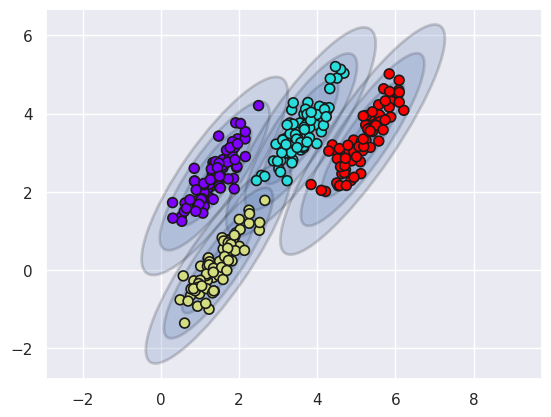

In [10]:
gmm3 = GaussianMixture(n_components=4, covariance_type='full', random_state=0)
plot_gmm(gmm3, X2)

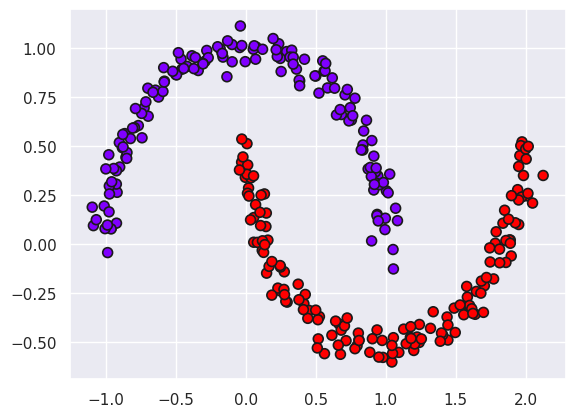

In [11]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=300, noise=0.05, random_state=0)
plt.scatter(X[:,0], X[:,1], c=y, s=50, ec='k', lw=1.2,
            cmap=mpl.colormaps['rainbow'].resampled(4))

<ipython-input-7-90fba44b2b54>:15: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ellip = Ellipse(position, nsig*width, nsig*height, angle, **kwargs)


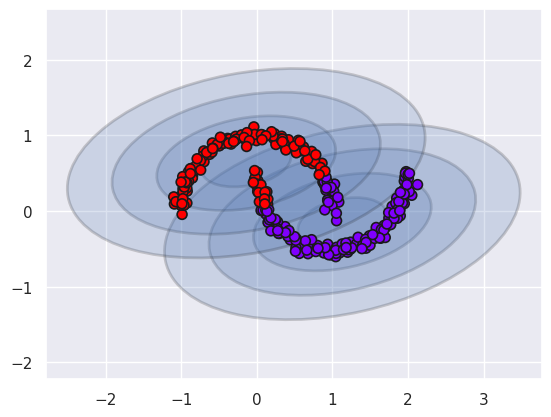

In [12]:
gmm4 = GaussianMixture(n_components=2, covariance_type='full', random_state=0)
plot_gmm(gmm4, X)

<ipython-input-7-90fba44b2b54>:15: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ellip = Ellipse(position, nsig*width, nsig*height, angle, **kwargs)


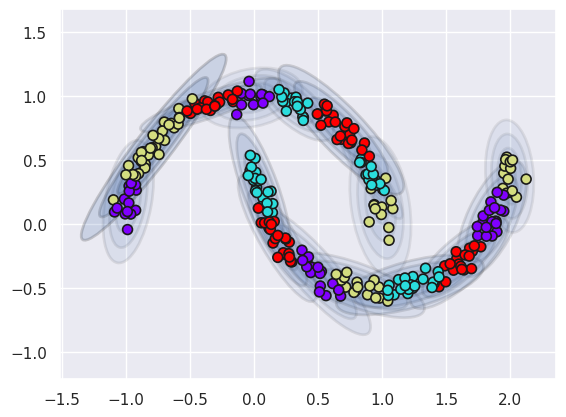

In [13]:
gmm5 = GaussianMixture(n_components=16, covariance_type='full', random_state=0)
plot_gmm(gmm5, X)

In [15]:
X_comb_new = gmm5.sample(n_samples=500)
X_new = X_comb_new[0]
y_new = X_comb_new[1]
print(X_new.shape, y_new.shape)

(500, 2) (500,)


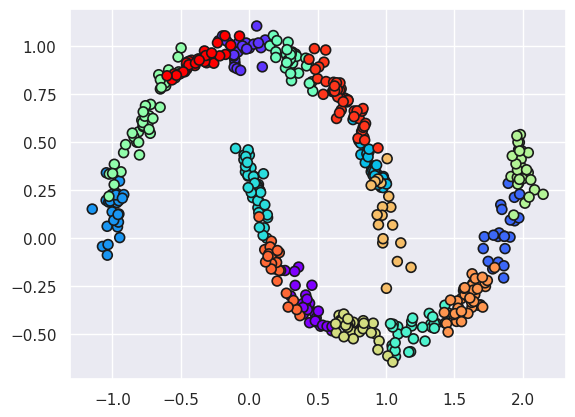

In [17]:
plt.scatter(X_new[:,0], X_new[:,1], c=y_new,
            s=50, ec='k', lw=1.2,
            cmap=mpl.colormaps['rainbow'].resampled(16))

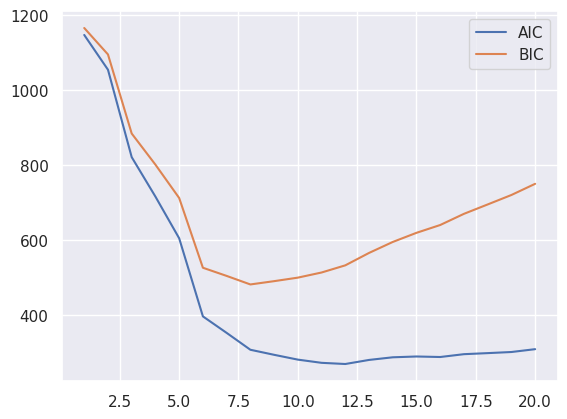

In [18]:
n_components = np.arange(1,21)
models = [GaussianMixture(n_components=n, covariance_type='full', random_state=0).fit(X) \
          for n in n_components]
plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
plt.legend(loc='best')